#### Note: Before starting 

It is important to notice that every single data extraction from mixed playlist were made taking into account the following location of the file, inside of a folder called 'data'

mixed_playlist = pd.read_csv('data/mixed_playlist.csv')

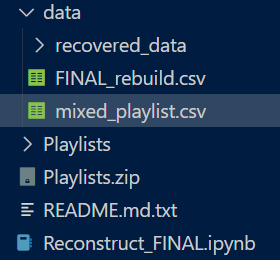

The distribution of this Jupiter Notebook is the following

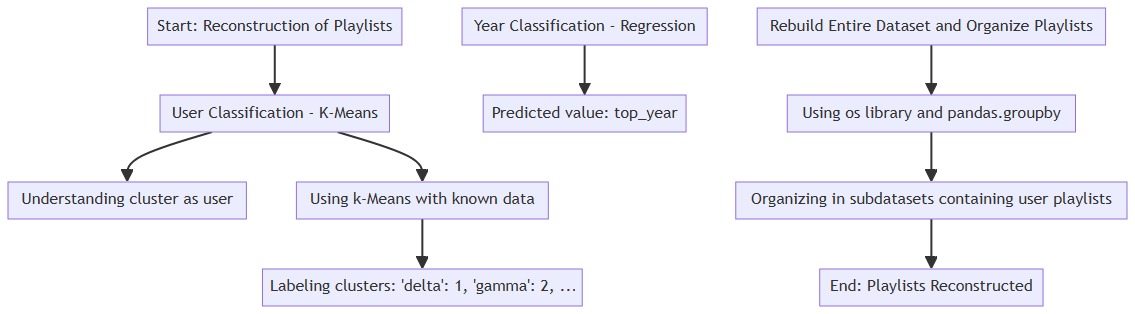

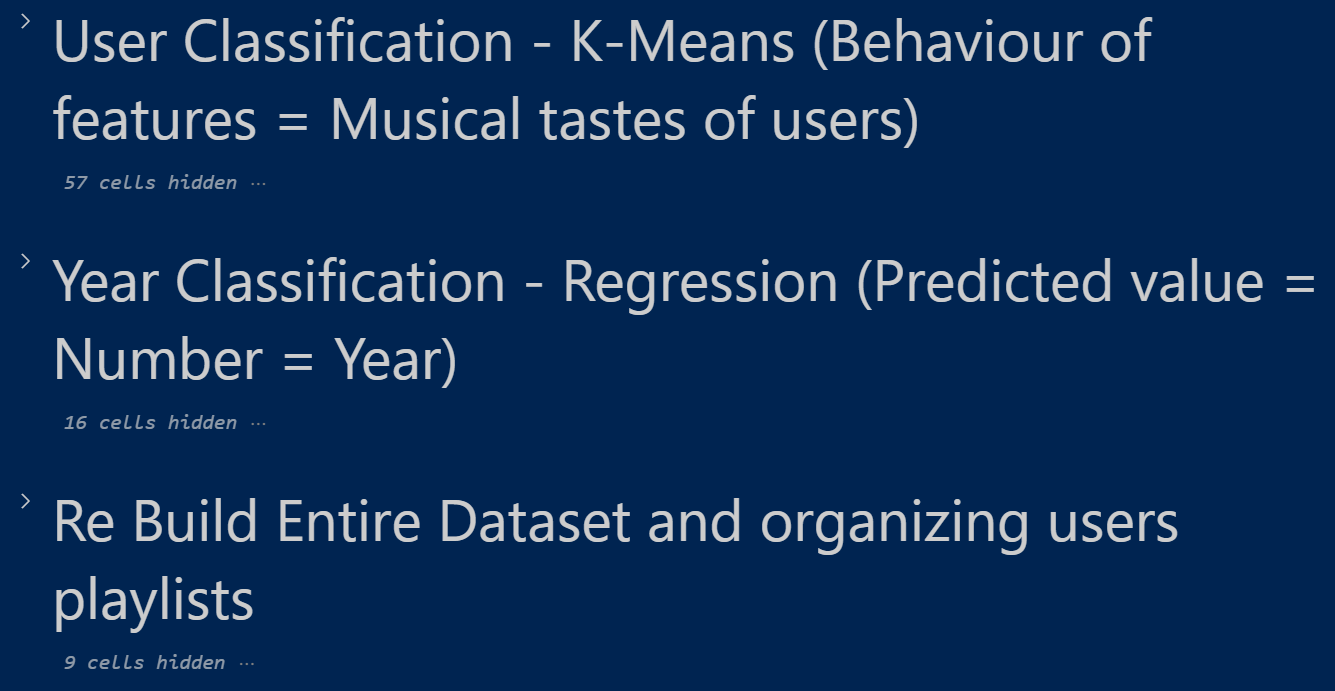

The final output will be a folder called 'Playlists' with all the playlists for each user and each year, with the same structure as 'recovered_data' folder

At the end it was proposed an accesing to the users playlist throught dictionaries


ABC

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'




# User Classification - K-Means (Behaviour of features = Musical tastes of users)

In [4]:
mixed_playlist = pd.read_csv('data/mixed_playlist.csv')

In [5]:
# Create a new "Id" column with values 'C1', 'C2', 'C3', ...
mixed_playlist['Id'] = ['C{}'.format(i) for i in range(1, len(mixed_playlist) + 1)]

# Save the updated DataFrame with the "Id" column
# mixed_playlist.to_csv('data/mixed_playlist_with_id.csv', index=False)

In [6]:
mixed_playlist

name  \
0     Variations on a Polish Theme, Op. 10: No. 5 An...   
1     Je vous trouve un charme fou - En duo avec Gaë...   
2                                              Me Gusta   
3                                  L’amour en Solitaire   
4                                        Goodnight Moon   
...                                                 ...   
3894                                 My Funny Valentine   
3895                                        Petit homme   
3896              Neo-Tokyo - Dance With The Dead Remix   
3897                                               Fool   
3898                           Sea, Sex And Sun - Remix   

                                      album             artist release_date  \
0          Szymanowski: Piano Works, Vol. 2  Karol Szymanowski   06/12/1996   
1     Il suffit d'y croire (Version deluxe)              Hoshi   2018-11-30   
2                               On ira où ?                DTF   2019-10-11   
3                      Petite Amie (Deluxe)   Juliette Armanet   2018-02-02   
4                                     Volta    Boogie Belgique   2016-09-23   
...                                     ...                ...          ...   
3894                           Undercurrent         Bill Evans         1962   
3895            Earthquake (Edition Deluxe)            Kolinga   2019-04-05   
3896   Dreams of Neo-Tokyo (Deluxe Edition)          Scandroid   2017-03-31   
3897                                   Fool              Antis   2017-12-15   
3898               Sea, Sex And Sun (Remix)   Serge Gainsbourg   29/04/2022   

      length  popularity  acousticness  danceability   energy  \
0      76933          53      0.996000         0.329  0.00695   
1     172626          62      0.622000         0.615  0.59900   
2     175269          72      0.413000         0.834  0.73400   
3     175266           0      0.404000         0.797  0.50600   
4     264735          53      0.061600         0.788  0.67500   
...      ...         ...           ...           ...      ...   
3894  324133          41      0.992000         0.529  0.13300   
3895  185506           0      0.942000         0.417  0.19600   
3896  352105          51      0.000016         0.467  0.95400   
3897  154826          16      0.045300         0.589  0.79200   
3898  229626          33      0.161000         0.724  0.73600   

      instrumentalness  ...    tempo  valence  time_signature  key  mode  \
0             0.866000  ...   70.295    0.238               4   11     0   
1             0.000008  ...   86.976    0.626               4    1     1   
2             0.000040  ...   89.989    0.356               4    6     0   
3             0.000153  ...  128.027    0.539               4    5     0   
4             0.711000  ...  107.993    0.525               4    7     0   
...                ...  ...      ...      ...             ...  ...   ...   
3894          0.922000  ...  115.924    0.585               4    0     0   
3895          0.001700  ...   76.774    0.505               3    4     0   
3896          0.908000  ...  122.004    0.061               4    0     0   
3897          0.008480  ...  182.051    0.658               4    6     1   
3898          0.004440  ...  118.989    0.384               4    5     1   

                                       uri  release_year  top_year     user  \
0     spotify:track:3bcdLMrAxrfn5dxInjIdI2          1996   unknown  unknown   
1     spotify:track:0C2yaSWVgCUiiqPyYxSOkd          2018      2022    delta   
2     spotify:track:6P3FBaZfUjeWYExU2ShaPZ          2019      2020    gamma   
3     spotify:track:2tn51grfchxArwPXeXkoX5          2018      2018    gamma   
4     spotify:track:2rvo9Ddv18aRV0OJldhWTf          2016      2020    alpha   
...                                    ...           ...       ...      ...   
3894  spotify:track:5jIvud0zWXDpINxFqXfbpv          1962      2020     beta   
3895  spotify:track:6ejfdgCwtSp7g2kl9RMAT1          2019      2020 

In [7]:
# To display categories "Users" that exists in the column user
num_categories = mixed_playlist.user.unique()
print(num_categories)

['unknown' 'delta' 'gamma' 'alpha' 'dzeta' 'beta' 'epsilon']


In [8]:
mapping = {'unknown': 0, 'alpha': 1, 'beta': 2, 'delta': 3, 'epsilon': 4, 'gamma': 5, 'dzeta': 6}
mixed_playlist['user'] = mixed_playlist['user'].replace(mapping)
mixed_playlist.user

0       0
1       3
2       5
3       5
4       1
       ..
3894    2
3895    3
3896    6
3897    2
3898    0
Name: user, Length: 3899, dtype: int64

In [9]:
mixed_playlist

name  \
0     Variations on a Polish Theme, Op. 10: No. 5 An...   
1     Je vous trouve un charme fou - En duo avec Gaë...   
2                                              Me Gusta   
3                                  L’amour en Solitaire   
4                                        Goodnight Moon   
...                                                 ...   
3894                                 My Funny Valentine   
3895                                        Petit homme   
3896              Neo-Tokyo - Dance With The Dead Remix   
3897                                               Fool   
3898                           Sea, Sex And Sun - Remix   

                                      album             artist release_date  \
0          Szymanowski: Piano Works, Vol. 2  Karol Szymanowski   06/12/1996   
1     Il suffit d'y croire (Version deluxe)              Hoshi   2018-11-30   
2                               On ira où ?                DTF   2019-10-11   
3                      Petite Amie (Deluxe)   Juliette Armanet   2018-02-02   
4                                     Volta    Boogie Belgique   2016-09-23   
...                                     ...                ...          ...   
3894                           Undercurrent         Bill Evans         1962   
3895            Earthquake (Edition Deluxe)            Kolinga   2019-04-05   
3896   Dreams of Neo-Tokyo (Deluxe Edition)          Scandroid   2017-03-31   
3897                                   Fool              Antis   2017-12-15   
3898               Sea, Sex And Sun (Remix)   Serge Gainsbourg   29/04/2022   

      length  popularity  acousticness  danceability   energy  \
0      76933          53      0.996000         0.329  0.00695   
1     172626          62      0.622000         0.615  0.59900   
2     175269          72      0.413000         0.834  0.73400   
3     175266           0      0.404000         0.797  0.50600   
4     264735          53      0.061600         0.788  0.67500   
...      ...         ...           ...           ...      ...   
3894  324133          41      0.992000         0.529  0.13300   
3895  185506           0      0.942000         0.417  0.19600   
3896  352105          51      0.000016         0.467  0.95400   
3897  154826          16      0.045300         0.589  0.79200   
3898  229626          33      0.161000         0.724  0.73600   

      instrumentalness  ...    tempo  valence  time_signature  key  mode  \
0             0.866000  ...   70.295    0.238               4   11     0   
1             0.000008  ...   86.976    0.626               4    1     1   
2             0.000040  ...   89.989    0.356               4    6     0   
3             0.000153  ...  128.027    0.539               4    5     0   
4             0.711000  ...  107.993    0.525               4    7     0   
...                ...  ...      ...      ...             ...  ...   ...   
3894          0.922000  ...  115.924    0.585               4    0     0   
3895          0.001700  ...   76.774    0.505               3    4     0   
3896          0.908000  ...  122.004    0.061               4    0     0   
3897          0.008480  ...  182.051    0.658               4    6     1   
3898          0.004440  ...  118.989    0.384               4    5     1   

                                       uri  release_year  top_year user     Id  
0     spotify:track:3bcdLMrAxrfn5dxInjIdI2          1996   unknown    0     C1  
1     spotify:track:0C2yaSWVgCUiiqPyYxSOkd          2018      2022    3     C2  
2     spotify:track:6P3FBaZfUjeWYExU2ShaPZ          2019      2020    5     C3  
3     spotify:track:2tn51grfchxArwPXeXkoX5          2018      2018    5     C4  
4     spotify:track:2rvo9Ddv18aRV0OJldhWTf          2016      2020    1     C5  
...                                    ...           ...       ...  ...    ...  
3894  spotify:track:5jIvud0zWXDpINxFqXfbpv          1962      2020    2  C3895  
3895  spotify:track:6ejfdgCwtSp7g2kl9RMAT1         

In [10]:
# Replace 'unknown' values in 'top_year' column with 0
mixed_playlist['top_year'] = mixed_playlist['top_year'].replace('unknown', 0)

mixed_playlist.top_year

0          0
1       2022
2       2020
3       2018
4       2020
        ... 
3894    2020
3895    2020
3896    2021
3897    2018
3898       0
Name: top_year, Length: 3899, dtype: object

In [11]:
mixed_playlist.info()
mixed_playlist.dropna(inplace=True)

# display the descriptive statistics of numeric variables
mixed_playlist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3890 non-null   object 
 1   album             3890 non-null   object 
 2   artist            3899 non-null   object 
 3   release_date      3899 non-null   object 
 4   length            3899 non-null   int64  
 5   popularity        3899 non-null   int64  
 6   acousticness      3899 non-null   float64
 7   danceability      3899 non-null   float64
 8   energy            3899 non-null   float64
 9   instrumentalness  3899 non-null   float64
 10  liveness          3899 non-null   float64
 11  loudness          3899 non-null   float64
 12  speechiness       3899 non-null   float64
 13  tempo             3899 non-null   float64
 14  valence           3899 non-null   float64
 15  time_signature    3899 non-null   int64  
 16  key               3899 non-null   int64  


length   popularity  acousticness  danceability       energy  \
count  3.890000e+03  3890.000000   3890.000000   3890.000000  3890.000000   
mean   2.444187e+05    32.005398      0.425120      0.554521     0.523066   
std    1.045747e+05    24.920088      0.363021      0.192029     0.265409   
min    3.105300e+04     0.000000      0.000001      0.000000     0.000545   
25%    1.880332e+05     1.000000      0.058025      0.424250     0.313000   
50%    2.242485e+05    34.000000      0.339000      0.575000     0.547500   
75%    2.744900e+05    51.000000      0.793000      0.701000     0.738750   
max    1.921683e+06    91.000000      0.996000      0.971000     0.995000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3890.000000  3890.000000  3890.000000  3890.000000  3890.000000   
mean           0.296768     0.167134   -10.436968     0.085179   115.826347   
std            0.386456     0.143656     6.209512     0.092698    28.662454   
min            0.000000     0.017900   -42.117000     0.000000     0.000000   
25%            0.000004     0.094500   -12.790000     0.036800    94.546750   
50%            0.005730     0.112000    -8.589000     0.047000   115.151500   
75%            0.773000     0.172000    -6.222500     0.086775   131.986750   
max            0.995000     0.991000     0.532000     0.952000   209.596000   

           valence  time_signature          key         mode  release_year  \
count  3890.000000     3890.000000  3890.000000  3890.000000   3890.000000   
mean      0.384641        3.873779     5.295630     0.466838   2012.748072   
std       0.254691        0.465588     3.507038     0.498963     10.418784   
min       0.000000        0.000000     0.000000     0.000000   1957.000000   
25%       0.161000        4.000000     2.000000     0.000000   2012.000000   
50%       0.355000        4.000000     5.000000     0.000000   2016.000000   
75%       0.572000        4.000000     8.000000     1.000000   2018.000000   
max       0.981000        5.000000    11.000000     1.000000   2022.000000   

              user  
count  3890.000000  
mean      3.152699  
std       1.643402  
min       0.000000  
25%       2.000000  
50%       3.000000  
75%       5.000000  
max       6.000000

In [12]:
# display the correlation matrix between numeric variables
corr = mixed_playlist.corr()
corr.style.background_gradient(cmap = 'coolwarm')

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14104\4207570641.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [13]:
correlation_matrix = mixed_playlist.corr()
# You can set a threshold for correlation values and remove features with high correlation
threshold = 0.7  # Adjust this threshold as needed
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

mixed_playlist.drop(highly_correlated_features, axis=1, inplace=True)

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14104\1644523848.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [14]:
# It is considered Irrelevant features every description or string that does not contribute in understanding the nature of the song
irrelevant_features = ['name', 'album', 'artist','release_date','uri', 'top_year']  # Modify this list with your irrelevant feature names
mixed_playlist.drop(irrelevant_features, axis=1, inplace=True)


In [16]:
mixed_playlist

length  popularity  acousticness  danceability  instrumentalness  \
0      76933          53      0.996000         0.329          0.866000   
1     172626          62      0.622000         0.615          0.000008   
2     175269          72      0.413000         0.834          0.000040   
3     175266           0      0.404000         0.797          0.000153   
4     264735          53      0.061600         0.788          0.711000   
...      ...         ...           ...           ...               ...   
3894  324133          41      0.992000         0.529          0.922000   
3895  185506           0      0.942000         0.417          0.001700   
3896  352105          51      0.000016         0.467          0.908000   
3897  154826          16      0.045300         0.589          0.008480   
3898  229626          33      0.161000         0.724          0.004440   

      liveness  speechiness    tempo  valence  time_signature  key  mode  \
0       0.0906       0.0448   70.295    0.238               4   11     0   
1       0.1920       0.2530   86.976    0.626               4    1     1   
2       0.1130       0.3410   89.989    0.356               4    6     0   
3       0.2550       0.0327  128.027    0.539               4    5     0   
4       0.1000       0.0318  107.993    0.525               4    7     0   
...        ...          ...      ...      ...             ...  ...   ...   
3894    0.1100       0.0575  115.924    0.585               4    0     0   
3895    0.1250       0.0871   76.774    0.505               3    4     0   
3896    0.0856       0.0414  122.004    0.061               4    0     0   
3897    0.1020       0.0569  182.051    0.658               4    6     1   
3898    0.1620       0.0455  118.989    0.384               4    5     1   

      release_year  user     Id  
0             1996     0     C1  
1             2018     3     C2  
2             2019     5     C3  
3             2018     5     C4  
4             2016     1     C5  
...            ...   ...    ...  
3894          1962     2  C3895  
3895          2019     3  C3896  
3896          2017     6  C3897  
3897          2017     2  C3898  
3898          2022     0  C3899  

[3890 rows x 15 columns]

In [17]:
mixed_playlist['user'].value_counts().get(0)

100

In [18]:
# Extracting rows where 'user' is 0 into a new DataFrame
unknown_df = mixed_playlist[mixed_playlist['user'] == 0]

In [19]:
unknown_df

length  popularity  acousticness  danceability  instrumentalness  \
0       76933          53         0.996         0.329           0.86600   
75     183773          22         0.994         0.629           0.94700   
80     551666          20         0.981         0.208           0.91900   
92     321146          26         0.870         0.258           0.89800   
150   1009706          27         0.913         0.502           0.85700   
...       ...         ...           ...           ...               ...   
3645   160826          34         0.960         0.443           0.91700   
3725   165626          32         0.996         0.912           0.74100   
3761   175680          36         0.982         0.146           0.93300   
3802   150000           0         0.984         0.157           0.06610   
3898   229626          33         0.161         0.724           0.00444   

      liveness  speechiness    tempo  valence  time_signature  key  mode  \
0       0.0906       0.0448   70.295   0.2380               4   11     0   
75      0.0864       0.0406  111.454   0.2410               4    0     0   
80      0.0843       0.0342   62.543   0.0420               4    4     1   
92      0.1480       0.0381   98.874   0.0378               4    5     0   
150     0.0914       0.0473  105.740   0.5590               4    7     0   
...        ...          ...      ...      ...             ...  ...   ...   
3645    0.1100       0.0516  117.938   0.1510               3    4     0   
3725    0.1150       0.0572  117.872   0.9490               4    9     0   
3761    0.0748       0.0401   76.216   0.0393               4    5     0   
3802    0.2760       0.0394  156.875   0.0378               1    6     0   
3898    0.1620       0.0455  118.989   0.3840               4    5     1   

      release_year  user     Id  
0             1996     0     C1  
75            2018     0    C76  
80            1998     0    C81  
92            2019     0    C93  
150           1992     0   C151  
...            ...   ...    ...  
3645          1997     0  C3646  
3725          2003     0  C3726  
3761          2008     0  C3762  
3802          1999     0  C3803  
3898          2022     0  C3899  

[100 rows x 15 columns]

In [21]:
# Removing these rows from the original mixed_playlist DataFrame
mixed_playlist = mixed_playlist[mixed_playlist['user'] != 0]

In [22]:
mixed_playlist

length  popularity  acousticness  danceability  instrumentalness  \
1     172626          62      0.622000         0.615          0.000008   
2     175269          72      0.413000         0.834          0.000040   
3     175266           0      0.404000         0.797          0.000153   
4     264735          53      0.061600         0.788          0.711000   
5     256906           0      0.419000         0.677          0.080200   
...      ...         ...           ...           ...               ...   
3893  160000          82      0.650000         0.709          0.000002   
3894  324133          41      0.992000         0.529          0.922000   
3895  185506           0      0.942000         0.417          0.001700   
3896  352105          51      0.000016         0.467          0.908000   
3897  154826          16      0.045300         0.589          0.008480   

      liveness  speechiness    tempo  valence  time_signature  key  mode  \
1       0.1920       0.2530   86.976    0.626               4    1     1   
2       0.1130       0.3410   89.989    0.356               4    6     0   
3       0.2550       0.0327  128.027    0.539               4    5     0   
4       0.1000       0.0318  107.993    0.525               4    7     0   
5       0.1080       0.0501  143.219    0.552               4    2     0   
...        ...          ...      ...      ...             ...  ...   ...   
3893    0.1330       0.3530   83.995    0.543               4   10     1   
3894    0.1100       0.0575  115.924    0.585               4    0     0   
3895    0.1250       0.0871   76.774    0.505               3    4     0   
3896    0.0856       0.0414  122.004    0.061               4    0     0   
3897    0.1020       0.0569  182.051    0.658               4    6     1   

      release_year  user     Id  
1             2018     3     C2  
2             2019     5     C3  
3             2018     5     C4  
4             2016     1     C5  
5             2017     3     C6  
...            ...   ...    ...  
3893          2020     5  C3894  
3894          1962     2  C3895  
3895          2019     3  C3896  
3896          2017     6  C3897  
3897          2017     2  C3898  

[3790 rows x 15 columns]

The user column is deleted to let the model calculate the musical tastes clustering based on feautures

In [23]:
del mixed_playlist['user']

In [24]:
mixed_playlist

length  popularity  acousticness  danceability  instrumentalness  \
1     172626          62      0.622000         0.615          0.000008   
2     175269          72      0.413000         0.834          0.000040   
3     175266           0      0.404000         0.797          0.000153   
4     264735          53      0.061600         0.788          0.711000   
5     256906           0      0.419000         0.677          0.080200   
...      ...         ...           ...           ...               ...   
3893  160000          82      0.650000         0.709          0.000002   
3894  324133          41      0.992000         0.529          0.922000   
3895  185506           0      0.942000         0.417          0.001700   
3896  352105          51      0.000016         0.467          0.908000   
3897  154826          16      0.045300         0.589          0.008480   

      liveness  speechiness    tempo  valence  time_signature  key  mode  \
1       0.1920       0.2530   86.976    0.626               4    1     1   
2       0.1130       0.3410   89.989    0.356               4    6     0   
3       0.2550       0.0327  128.027    0.539               4    5     0   
4       0.1000       0.0318  107.993    0.525               4    7     0   
5       0.1080       0.0501  143.219    0.552               4    2     0   
...        ...          ...      ...      ...             ...  ...   ...   
3893    0.1330       0.3530   83.995    0.543               4   10     1   
3894    0.1100       0.0575  115.924    0.585               4    0     0   
3895    0.1250       0.0871   76.774    0.505               3    4     0   
3896    0.0856       0.0414  122.004    0.061               4    0     0   
3897    0.1020       0.0569  182.051    0.658               4    6     1   

      release_year     Id  
1             2018     C2  
2             2019     C3  
3             2018     C4  
4             2016     C5  
5             2017     C6  
...            ...    ...  
3893          2020  C3894  
3894          1962  C3895  
3895          2019  C3896  
3896          2017  C3897  
3897          2017  C3898  

[3790 rows x 14 columns]

In [26]:
# Specify the columns you want to scale
columns_to_scale = ['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']

# Feauture Scaling for known data
scaler_unknown = MinMaxScaler()
unknown_df[columns_to_scale] = scaler_unknown.fit_transform(unknown_df[columns_to_scale])
unknown_df[columns_to_scale] = scaler_unknown.fit_transform(unknown_df[columns_to_scale])
unknown_df

#unknown_scaled = scaler_unknown.fit_transform(unknown_df('length','popularity','acousticness','danceability','instrumentalness','liveness','speechiness	tempo','valence','time_signature','key','mode','release_year'))
#unknown_df = pd.DataFrame(unknown_scaled, columns=unknown_df.columns)

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14104\1672251115.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14104\1672251115.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



length  popularity  acousticness  danceability  instrumentalness  \
0     0.003519    0.883333      1.000000      0.312419          0.898340   
75    0.089444    0.366667      0.997840      0.666234          0.982365   
80    0.385318    0.333333      0.983801      0.169713          0.953320   
92    0.199925    0.433333      0.863931      0.228683          0.931535   
150   0.753691    0.450000      0.910367      0.516452          0.889004   
...        ...         ...           ...           ...               ...   
3645  0.070989    0.566667      0.961123      0.446869          0.951245   
3725  0.074850    0.533333      1.000000      1.000000          0.768672   
3761  0.082935    0.600000      0.984881      0.096592          0.967842   
3802  0.062283    0.000000      0.987041      0.109565          0.068568   
3898  0.126321    0.550000      0.098272      0.778276          0.004606   

      liveness  speechiness     tempo   valence  time_signature       key  \
0     0.036596     0.046573  0.073941  0.221334            0.75  1.000000   
75    0.031489     0.036542  0.453692  0.224619            0.75  0.000000   
80    0.028936     0.021256  0.002417  0.006681            0.75  0.363636   
92    0.106383     0.030571  0.337624  0.002081            0.75  0.454545   
150   0.037568     0.052544  0.400972  0.572884            0.75  0.636364   
...        ...          ...       ...       ...             ...       ...   
3645  0.060182     0.062813  0.513517  0.126054            0.50  0.363636   
3725  0.066261     0.076188  0.512908  1.000000            0.75  0.818182   
3761  0.017386     0.035348  0.128571  0.003724            0.75  0.454545   
3802  0.262006     0.033676  0.872767  0.002081            0.00  0.545455   
3898  0.123404     0.048245  0.523214  0.381229            0.75  0.454545   

      mode  release_year  user     Id  
0      0.0      0.580645     0     C1  
75     0.0      0.935484     0    C76  
80     1.0      0.612903     0    C81  
92     0.0      0.951613     0    C93  
150    0.0      0.516129     0   C151  
...    ...           ...   ...    ...  
3645   0.0      0.596774     0  C3646  
3725   0.0      0.693548     0  C3726  
3761   0.0      0.774194     0  C3762  
3802   0.0      0.629032     0  C3803  
3898   1.0      1.000000     0  C3899  

[100 rows x 15 columns]

In [27]:
del unknown_df['user']
unknown_df

length  popularity  acousticness  danceability  instrumentalness  \
0     0.003519    0.883333      1.000000      0.312419          0.898340   
75    0.089444    0.366667      0.997840      0.666234          0.982365   
80    0.385318    0.333333      0.983801      0.169713          0.953320   
92    0.199925    0.433333      0.863931      0.228683          0.931535   
150   0.753691    0.450000      0.910367      0.516452          0.889004   
...        ...         ...           ...           ...               ...   
3645  0.070989    0.566667      0.961123      0.446869          0.951245   
3725  0.074850    0.533333      1.000000      1.000000          0.768672   
3761  0.082935    0.600000      0.984881      0.096592          0.967842   
3802  0.062283    0.000000      0.987041      0.109565          0.068568   
3898  0.126321    0.550000      0.098272      0.778276          0.004606   

      liveness  speechiness     tempo   valence  time_signature       key  \
0     0.036596     0.046573  0.073941  0.221334            0.75  1.000000   
75    0.031489     0.036542  0.453692  0.224619            0.75  0.000000   
80    0.028936     0.021256  0.002417  0.006681            0.75  0.363636   
92    0.106383     0.030571  0.337624  0.002081            0.75  0.454545   
150   0.037568     0.052544  0.400972  0.572884            0.75  0.636364   
...        ...          ...       ...       ...             ...       ...   
3645  0.060182     0.062813  0.513517  0.126054            0.50  0.363636   
3725  0.066261     0.076188  0.512908  1.000000            0.75  0.818182   
3761  0.017386     0.035348  0.128571  0.003724            0.75  0.454545   
3802  0.262006     0.033676  0.872767  0.002081            0.00  0.545455   
3898  0.123404     0.048245  0.523214  0.381229            0.75  0.454545   

      mode  release_year     Id  
0      0.0      0.580645     C1  
75     0.0      0.935484    C76  
80     1.0      0.612903    C81  
92     0.0      0.951613    C93  
150    0.0      0.516129   C151  
...    ...           ...    ...  
3645   0.0      0.596774  C3646  
3725   0.0      0.693548  C3726  
3761   0.0      0.774194  C3762  
3802   0.0      0.629032  C3803  
3898   1.0      1.000000  C3899  

[100 rows x 14 columns]

In [29]:
# Feauture Scaling for known data
scaler = MinMaxScaler()

# Specify the columns you want to scale
columns_to_scale = ['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']

# Feature Scaling for known data
scaler = MinMaxScaler()

# Apply the scaler to the selected columns in the DataFrame
mixed_playlist[columns_to_scale] = scaler.fit_transform(mixed_playlist[columns_to_scale])

mixed_playlist

#mixed_playlist_scaled = scaler.fit_transform(mixed_playlist)
#mixed_playlist = pd.DataFrame(mixed_playlist_scaled, columns=mixed_playlist.columns)


length  popularity  acousticness  danceability  instrumentalness  \
1     0.074881    0.681319      0.624497      0.633368          0.000008   
2     0.076279    0.791209      0.414658      0.858908          0.000040   
3     0.076278    0.000000      0.405622      0.820803          0.000154   
4     0.123600    0.582418      0.061846      0.811535          0.714573   
5     0.119459    0.000000      0.420682      0.697219          0.080603   
...        ...         ...           ...           ...               ...   
3893  0.068203    0.901099      0.652610      0.730175          0.000002   
3894  0.155017    0.450549      0.995984      0.544799          0.926633   
3895  0.081694    0.000000      0.945783      0.429454          0.001709   
3896  0.169812    0.560440      0.000015      0.480947          0.912563   
3897  0.065467    0.175824      0.045481      0.606591          0.008523   

      liveness  speechiness     tempo   valence  time_signature       key  \
1     0.178913     0.265756  0.414970  0.638124             0.8  0.090909   
2     0.097729     0.358193  0.429345  0.362895             0.8  0.545455   
3     0.243654     0.034349  0.610827  0.549439             0.8  0.454545   
4     0.084370     0.033403  0.515244  0.535168             0.8  0.636364   
5     0.092591     0.052626  0.683310  0.562691             0.8  0.181818   
...        ...          ...       ...       ...             ...       ...   
3893  0.118282     0.370798  0.400747  0.553517             0.8  0.909091   
3894  0.094646     0.060399  0.553083  0.596330             0.8  0.000000   
3895  0.110061     0.091492  0.366295  0.514781             0.6  0.363636   
3896  0.069571     0.043487  0.582091  0.062181             0.8  0.000000   
3897  0.086425     0.059769  0.868581  0.670744             0.8  0.545455   

      mode  release_year     Id  
1      1.0      0.938462     C2  
2      0.0      0.953846     C3  
3      0.0      0.938462     C4  
4      0.0      0.907692     C5  
5      0.0      0.923077     C6  
...    ...           ...    ...  
3893   1.0      0.969231  C3894  
3894   0.0      0.076923  C3895  
3895   0.0      0.953846  C3896  
3896   0.0      0.923077  C3897  
3897   1.0      0.923077  C3898  

[3790 rows x 14 columns]

In [30]:
# K-Means clustering
X = mixed_playlist[['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']]

model = KMeans(
    n_clusters=6,       # 6 clusters referred to 6 users: 'delta', 'gamma', 'alpha', 'dzeta', 'beta', 'epsilon'
    n_init='auto',      # Multiple attempts with different initial centroids
    random_state=1,     # Fix random state to guarantee reproducibility
    verbose=1           # Output log
)

model.fit(X)

Initialization complete
Iteration 0, inertia 2536.148695893795.
Iteration 1, inertia 1741.030860686093.
Iteration 2, inertia 1664.46178331161.
Iteration 3, inertia 1646.6863180466994.
Iteration 4, inertia 1628.3031561379885.
Iteration 5, inertia 1613.995575941873.
Iteration 6, inertia 1609.1157106269297.
Iteration 7, inertia 1608.849117239102.
Iteration 8, inertia 1608.8385147212352.
Iteration 9, inertia 1608.8338576691108.
Converged at iteration 9: strict convergence.


KMeans(n_clusters=6, n_init='auto', random_state=1, verbose=1)

In [31]:
# obtain the cluster centers
model.cluster_centers_

array([[1.07179051e-01, 3.60881600e-01, 7.53523161e-01, 5.46756890e-01,
        4.45772542e-02, 1.58367221e-01, 8.60063104e-02, 5.53138686e-01,
        3.87055176e-01, 7.57142857e-01, 4.71120984e-01, 9.43689571e-16,
        8.33169462e-01],
       [1.25078569e-01, 3.20843091e-01, 5.04819274e-01, 4.56017626e-01,
        8.39415108e-01, 1.27692468e-01, 5.51782270e-02, 5.51702330e-01,
        2.20688157e-01, 7.57704918e-01, 5.11475410e-01, 9.43689571e-16,
        8.63959647e-01],
       [1.05164221e-01, 3.98581900e-01, 2.24239405e-01, 6.61319009e-01,
        2.18406392e-02, 1.68745452e-01, 1.14932368e-01, 5.55877308e-01,
        5.16880781e-01, 7.92422503e-01, 4.15301117e-01, 1.00000000e+00,
        8.55338691e-01],
       [1.03166493e-01, 3.75560440e-01, 1.63451156e-01, 6.77142622e-01,
        5.34537432e-02, 1.66355066e-01, 1.24913565e-01, 5.70974741e-01,
        5.37722907e-01, 7.96342857e-01, 5.61454545e-01, 1.05471187e-15,
        8.92043956e-01],
       [1.15639670e-01, 3.20185880e-

In [32]:
cluster_centers = pd.DataFrame(
    data=model.cluster_centers_,
    columns=X.columns
)

print(cluster_centers)

     length  popularity  acousticness  danceability  instrumentalness  \
0  0.107179    0.360882      0.753523      0.546757          0.044577   
1  0.125079    0.320843      0.504819      0.456018          0.839415   
2  0.105164    0.398582      0.224239      0.661319          0.021841   
3  0.103166    0.375560      0.163451      0.677143          0.053454   
4  0.115640    0.320186      0.870851      0.431777          0.417872   
5  0.126190    0.283787      0.108564      0.573117          0.798240   

   liveness  speechiness     tempo   valence  time_signature       key  \
0  0.158367     0.086006  0.553139  0.387055        0.757143  0.471121   
1  0.127692     0.055178  0.551702  0.220688        0.757705  0.511475   
2  0.168745     0.114932  0.555877  0.516881        0.792423  0.415301   
3  0.166355     0.124914  0.570975  0.537723        0.796343  0.561455   
4  0.128695     0.054841  0.510172  0.233312        0.745927  0.436269   
5  0.154917     0.066091  0.582555  0.285962

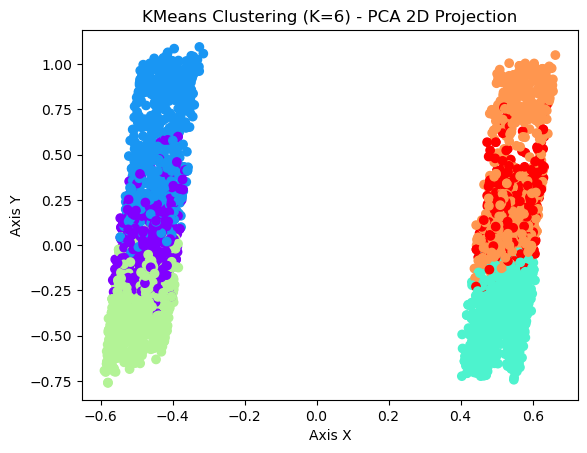

In [33]:

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Use the scaled data X, not mixed_playlist

# Get the cluster labels assigned by KMeans
cluster_labels = model.labels_

# Create a scatter plot to visualize the clusters
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('KMeans Clustering (K=6) - PCA 2D Projection')
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.show()

It can be seen the 6 Clusters that represent the 6 users musical tasting based on features



In [34]:
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X) # Use the scaled data X, not mixed_playlist
cluster_labels = model.labels_
fig = px.scatter_3d(
    x=X_3d[:, 0], 
    y=X_3d[:, 1], 
    z=X_3d[:, 2],
    color=cluster_labels,
    color_continuous_scale='Rainbow',
    title='KMeans Clustering (K=6) - PCA 3D Projection',
    labels={'x': 'Axis x', 'y': 'Axis Y', 'z': 'Axis Z'}
)
fig.show()

In [35]:
# Initialize an empty list to store predictions
predictions = []

# Loop through each row in the scaled 'unknown_df' DataFrame
for n in range(len(unknown_df)):
    # Access the nth row and reshape it to a 2D array
    row_data = unknown_df.iloc[n][columns_to_scale].values.reshape(1, -1)
    # Get the prediction and append it to the list
    prediction = model.predict(row_data)
    predictions.append(prediction[0])  # Assuming 'predict' returns a list or array

# Convert the list of predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

# Now 'predictions_df' is a DataFrame with all predictions
print(predictions_df)


c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\s

    Prediction
0            1
1            1
2            4
3            1
4            1
..         ...
95           1
96           1
97           1
98           0
99           2

[100 rows x 1 columns]


c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [36]:
# predictions_df['Prediction'].value_counts().get(0)
value_counts_df = predictions_df['Prediction'].value_counts().reset_index()
value_counts_df.columns = ['Prediction', 'Count']
value_counts_df = value_counts_df.sort_values(by='Prediction')
value_counts_df = value_counts_df.reset_index(drop=True)

value_counts_df

Prediction  Count
0           0     15
1           1     37
2           2     10
3           3      5
4           4     28
5           5      5

Adding predictions as number of user, it is important to know that the cluster number "user" is still unknow, because it is represented by a number

In [37]:
try_pred = predictions_df
try_unknow = unknown_df

# Reset index (Really important to pair predictions)
try_unknow.reset_index(drop=True, inplace=True)
try_unknow


length  popularity  acousticness  danceability  instrumentalness  \
0   0.003519    0.883333      1.000000      0.312419          0.898340   
1   0.089444    0.366667      0.997840      0.666234          0.982365   
2   0.385318    0.333333      0.983801      0.169713          0.953320   
3   0.199925    0.433333      0.863931      0.228683          0.931535   
4   0.753691    0.450000      0.910367      0.516452          0.889004   
..       ...         ...           ...           ...               ...   
95  0.070989    0.566667      0.961123      0.446869          0.951245   
96  0.074850    0.533333      1.000000      1.000000          0.768672   
97  0.082935    0.600000      0.984881      0.096592          0.967842   
98  0.062283    0.000000      0.987041      0.109565          0.068568   
99  0.126321    0.550000      0.098272      0.778276          0.004606   

    liveness  speechiness     tempo   valence  time_signature       key  mode  \
0   0.036596     0.046573  0.073941  0.221334            0.75  1.000000   0.0   
1   0.031489     0.036542  0.453692  0.224619            0.75  0.000000   0.0   
2   0.028936     0.021256  0.002417  0.006681            0.75  0.363636   1.0   
3   0.106383     0.030571  0.337624  0.002081            0.75  0.454545   0.0   
4   0.037568     0.052544  0.400972  0.572884            0.75  0.636364   0.0   
..       ...          ...       ...       ...             ...       ...   ...   
95  0.060182     0.062813  0.513517  0.126054            0.50  0.363636   0.0   
96  0.066261     0.076188  0.512908  1.000000            0.75  0.818182   0.0   
97  0.017386     0.035348  0.128571  0.003724            0.75  0.454545   0.0   
98  0.262006     0.033676  0.872767  0.002081            0.00  0.545455   0.0   
99  0.123404     0.048245  0.523214  0.381229            0.75  0.454545   1.0   

    release_year     Id  
0       0.580645     C1  
1       0.935484    C76  
2       0.612903    C81  
3       0.951613    C93  
4       0.516129   C151  
..           ...    ...  
95      0.596774  C3646  
96      0.693548  C3726  
97      0.774194  C3762  
98      0.629032  C3803  
99      1.000000  C3899  

[100 rows x 14 columns]

In [38]:
try_pred

Prediction
0            1
1            1
2            4
3            1
4            1
..         ...
95           1
96           1
97           1
98           0
99           2

[100 rows x 1 columns]

In [39]:

# Concatenate 'unknown_df' and 'merged_df' horizontally (along columns)
merged_df = pd.concat([try_unknow, try_pred], axis=1)

# Now 'result_df' contains 'unknown_df' with the 'Prediction' column added
merged_df 


length  popularity  acousticness  danceability  instrumentalness  \
0   0.003519    0.883333      1.000000      0.312419          0.898340   
1   0.089444    0.366667      0.997840      0.666234          0.982365   
2   0.385318    0.333333      0.983801      0.169713          0.953320   
3   0.199925    0.433333      0.863931      0.228683          0.931535   
4   0.753691    0.450000      0.910367      0.516452          0.889004   
..       ...         ...           ...           ...               ...   
95  0.070989    0.566667      0.961123      0.446869          0.951245   
96  0.074850    0.533333      1.000000      1.000000          0.768672   
97  0.082935    0.600000      0.984881      0.096592          0.967842   
98  0.062283    0.000000      0.987041      0.109565          0.068568   
99  0.126321    0.550000      0.098272      0.778276          0.004606   

    liveness  speechiness     tempo   valence  time_signature       key  mode  \
0   0.036596     0.046573  0.073941  0.221334            0.75  1.000000   0.0   
1   0.031489     0.036542  0.453692  0.224619            0.75  0.000000   0.0   
2   0.028936     0.021256  0.002417  0.006681            0.75  0.363636   1.0   
3   0.106383     0.030571  0.337624  0.002081            0.75  0.454545   0.0   
4   0.037568     0.052544  0.400972  0.572884            0.75  0.636364   0.0   
..       ...          ...       ...       ...             ...       ...   ...   
95  0.060182     0.062813  0.513517  0.126054            0.50  0.363636   0.0   
96  0.066261     0.076188  0.512908  1.000000            0.75  0.818182   0.0   
97  0.017386     0.035348  0.128571  0.003724            0.75  0.454545   0.0   
98  0.262006     0.033676  0.872767  0.002081            0.00  0.545455   0.0   
99  0.123404     0.048245  0.523214  0.381229            0.75  0.454545   1.0   

    release_year     Id  Prediction  
0       0.580645     C1           1  
1       0.935484    C76           1  
2       0.612903    C81           4  
3       0.951613    C93           1  
4       0.516129   C151           1  
..           ...    ...         ...  
95      0.596774  C3646           1  
96      0.693548  C3726           1  
97      0.774194  C3762           1  
98      0.629032  C3803           0  
99      1.000000  C3899           2  

[100 rows x 15 columns]

Create a Subset just with the number of cluster and the Id of the song

In [40]:
columns_to_show = ['Id', 'Prediction']
unknown_users_pred = merged_df.loc[:, columns_to_show]
# merged_df = merged_df.dropna(subset=['Id'])
unknown_users_pred

# If it is needed to review prediction pairsing, it can be done converting dataset to csv or looking at the variable in the kernel
#merged_df.to_csv('data/lol.csv', index=False)


Id  Prediction
0      C1           1
1     C76           1
2     C81           4
3     C93           1
4    C151           1
..    ...         ...
95  C3646           1
96  C3726           1
97  C3762           1
98  C3803           0
99  C3899           2

[100 rows x 2 columns]

In [41]:
# To display categories "Users" that exists in the column user
num_categories_subset = merged_df.Prediction.unique()
print(num_categories_subset)

[1 4 5 2 0 3]


#### Understanding cluster as user

Create a new dataset whit the original data of mixed playlist

Make prediction with a subset of mixed playlist known values, for understanding how the model makes the clusters to asign them to users 

Add the predicted changes of unknown values

In [42]:
mixed_playlist2 = pd.read_csv('data/mixed_playlist.csv')
# Create a new "Id" column with values 'C1', 'C2', 'C3', ...
mixed_playlist2['Id'] = ['C{}'.format(i) for i in range(1, len(mixed_playlist2) + 1)]

mapping = {'unknown': 0, 'delta': 1, 'gamma': 2, 'alpha': 3, 'dzeta': 4, 'beta': 5, 'epsilon': 6}
mixed_playlist2['user'] = mixed_playlist2['user'].replace(mapping)
# mixed_playlist2.user



In [43]:
correlation_matrix = mixed_playlist2.corr()
# You can set a threshold for correlation values and remove features with high correlation
threshold = 0.7  # Adjust this threshold as needed
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

mixed_playlist2.drop(highly_correlated_features, axis=1, inplace=True)

# Removing these rows from the original mixed_playlist DataFrame
mixed_playlist2 = mixed_playlist2[mixed_playlist2['user'] != 0]

C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14104\506893511.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [44]:
# Specify the columns you want to scale
columns_to_scale = ['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']

# Feauture Scaling for known data
scaler_unknown = MinMaxScaler()
mixed_playlist2[columns_to_scale] = scaler_unknown.fit_transform(mixed_playlist2[columns_to_scale])
mixed_playlist2[columns_to_scale] = scaler_unknown.fit_transform(mixed_playlist2[columns_to_scale])



In [45]:
mixed_playlist2

name  \
1     Je vous trouve un charme fou - En duo avec Gaë...   
2                                              Me Gusta   
3                                  L’amour en Solitaire   
4                                        Goodnight Moon   
5                                              Soothing   
...                                                 ...   
3893                            What You Know Bout Love   
3894                                 My Funny Valentine   
3895                                        Petit homme   
3896              Neo-Tokyo - Dance With The Dead Remix   
3897                                               Fool   

                                      album            artist release_date  \
1     Il suffit d'y croire (Version deluxe)             Hoshi   2018-11-30   
2                               On ira où ?               DTF   2019-10-11   
3                      Petite Amie (Deluxe)  Juliette Armanet   2018-02-02   
4                                     Volta   Boogie Belgique   2016-09-23   
5                             Semper Femina     Laura Marling   2017-03-10   
...                                     ...               ...          ...   
3893   Shoot For The Stars Aim For The Moon         Pop Smoke   2020-07-03   
3894                           Undercurrent        Bill Evans         1962   
3895            Earthquake (Edition Deluxe)           Kolinga   2019-04-05   
3896   Dreams of Neo-Tokyo (Deluxe Edition)         Scandroid   2017-03-31   
3897                                   Fool             Antis   2017-12-15   

        length  popularity  acousticness  danceability  instrumentalness  \
1     0.089831    0.681319      0.624497      0.633368          0.000008   
2     0.091206    0.791209      0.414658      0.858908          0.000040   
3     0.091204    0.000000      0.405622      0.820803          0.000154   
4     0.137762    0.582418      0.061846      0.811535          0.714573   
5     0.133688    0.000000      0.420682      0.697219          0.080603   
...        ...         ...           ...           ...               ...   
3893  0.083260    0.901099      0.652610      0.730175          0.000002   
3894  0.168671    0.450549      0.995984      0.544799          0.926633   
3895  0.096533    0.000000      0.945783      0.429454          0.001709   
3896  0.183227    0.560440      0.000015      0.480947          0.912563   
3897  0.080568    0.175824      0.045481      0.606591          0.008523   

      liveness  ...     tempo   valence  time_signature       key  mode  \
1     0.178913  ...  0.414970  0.638124             0.8  0.090909   1.0   
2     0.097729  ...  0.429345  0.362895             0.8  0.545455   0.0   
3     0.243654  ...  0.610827  0.549439             0.8  0.454545   0.0   
4     0.084370  ...  0.515244  0.535168             0.8  0.636364   0.0   
5     0.092591  ...  0.683310  0.562691             0.8  0.181818   0.0   
...        ...  ...       ...       ...             ...       ...   ...   
3893  0.118282  ...  0.400747  0.553517             0.8  0.909091   1.0   
3894  0.094646  ...  0.553083  0.596330             0.8  0.000000   0.0   
3895  0.110061  ...  0.366295  0.514781             0.6  0.363636   0.0   
3896  0.069571  ...  0.582091  0.062181             0.8  0.000000   0.0   
3897  0.086425  ...  0.868581  0.670744             0.8  0.545455   1.0   

                                       uri release_year  top_year user     Id  
1     spotify:track:0C2yaSWVgCUiiqPyYxSOkd     0.998022      2022    1     C2  
2     spotify:track:6P3FBaZfUjeWYExU2ShaPZ     0.998516      2020    2     C3  
3     spotify:track:2tn51grfchxArwPXeXkoX5     0.998022      2018    2     C4  
4     spotify:track:2rvo9Ddv18aRV0OJldhWTf     0.997033      2020    3     C5  
5     spotify:track:2KKBONcn6UBAH3paFgPkfZ     0.997527      2018    1     C6  
...                                    ...          ...       ...  ...    ...  
3893  spotify:track:1tkg4EHVoqn

In [46]:
# Randomly sample 250 rows from the 'mixed_playlist2' dataset
sub_dataset = mixed_playlist2.sample(n=100, random_state=42)

# Now, 'sub_dataset' contains 200 random rows from 'mixed_playlist2'

In [47]:
# Initialize an empty list to store predictions
predictions2 = []

# Loop through each row in the scaled 'unknown_df' DataFrame
for n in range(len(sub_dataset)):
    # Access the nth row and reshape it to a 2D array
    row_data = sub_dataset.iloc[n][columns_to_scale].values.reshape(1, -1)
    # Get the prediction and append it to the list
    prediction2 = model.predict(row_data)
    predictions2.append(prediction2[0])  # Assuming 'predict' returns a list or array

# Convert the list of predictions to a DataFrame
predictions_df2 = pd.DataFrame(predictions2, columns=['Prediction2'])

# Now 'predictions_df' is a DataFrame with all predictions
print(predictions_df2)

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\s

    Prediction2
0             2
1             3
2             3
3             1
4             2
..          ...
95            1
96            2
97            3
98            3
99            0

[100 rows x 1 columns]


c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [48]:
# predictions_df['Prediction'].value_counts().get(0)
value_counts_df2 = predictions_df2['Prediction2'].value_counts().reset_index()
value_counts_df2.columns = ['Prediction2', 'Count']
value_counts_df2 = value_counts_df2.sort_values(by='Prediction2')
value_counts_df2 = value_counts_df2.reset_index(drop=True)

value_counts_df2

Prediction2  Count
0            0     19
1            1     21
2            2     19
3            3     20
4            4     11
5            5     10

In [49]:
try_pred2 = predictions_df2
try_mixed2 = sub_dataset

# Reset index (Really important to pair predictions)
try_mixed2.reset_index(drop=True, inplace=True)
#try_mixed2

In [52]:
# Concatenate 'unknown_df' and 'merged_df' horizontally (along columns)
merged_df2 = pd.concat([try_mixed2, try_pred2], axis=1)

# Now 'result_df' contains 'unknown_df' with the 'Prediction' column added
#merged_df2 

There are 2 groups of 3 users that has similar musical "tasting", that means that some songs could not be differentiate if are part of one user playlist or another, but at the end, for the user it would not matter, because every single classified song was selected analyzing his own musical tasting  

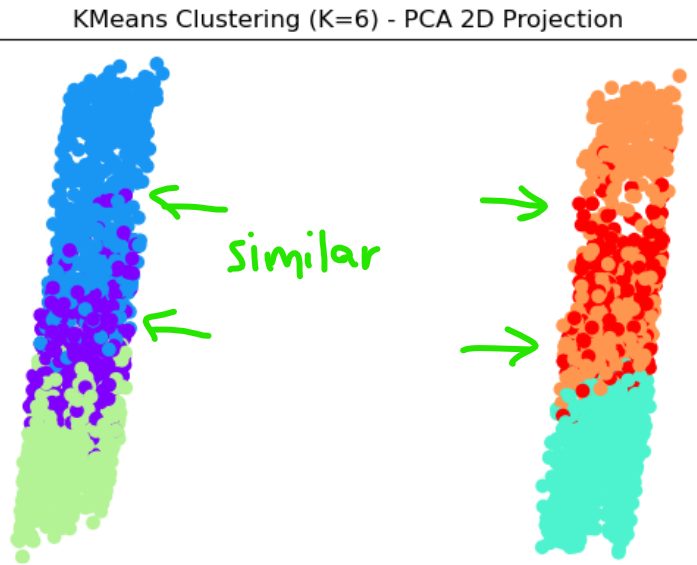

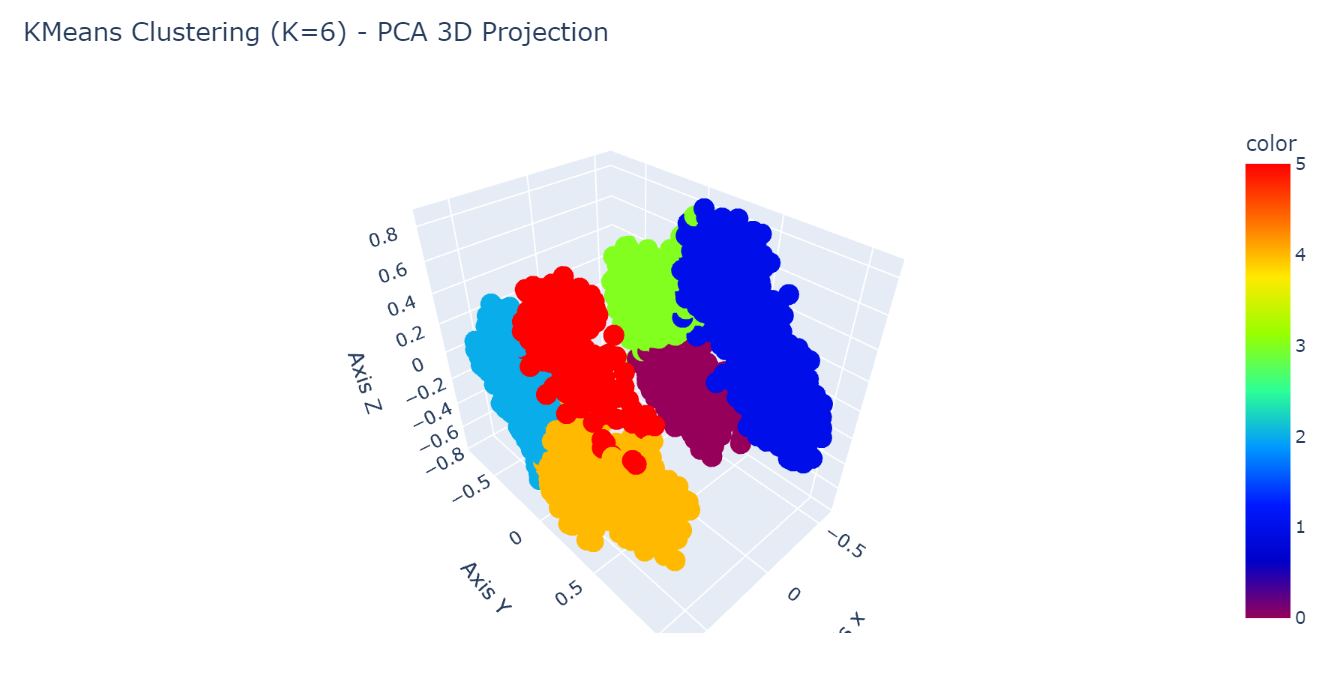

##### Warning!

To pair number of cluster to 'User', it can be made using the known user number as label and making simple statistics of predicted values, just to know every simgle cluster tendency to being the musical tasting of an specific user

It is important to take into account the following pre-stablish labels
{'alpha': 1, 'beta': 2, 'delta': 3, 'epsilon': 4, 'gamma': 5, 'zeta': 6}

In [53]:
alpha_tasting = merged_df2[merged_df2['user']== 1] 
# alpha_tasting
# Calculate the mode of the 'Prediction2' column
alpha_mode_value = alpha_tasting['Prediction2'].mode().values[0]
print(f"Alpha Mode: {alpha_mode_value}")
aplha_counts = alpha_tasting['Prediction2'].value_counts().reset_index()

beta_tasting = merged_df2[merged_df2['user']== 2] 
# Calculate the mode of the 'Prediction2' column
beta_mode_value = beta_tasting['Prediction2'].mode().values[0]
print(f"Beta Mode: {beta_mode_value}")

delta_tasting = merged_df2[merged_df2['user']== 3] 
# Calculate the mode of the 'Prediction2' column
delta_mode_value = delta_tasting['Prediction2'].mode().values[0]
print(f"Delta Mode: {delta_mode_value}")

epsilon_tasting = merged_df2[merged_df2['user']== 4] 
# Calculate the mode of the 'Prediction2' column
epsilon_mode_value = epsilon_tasting['Prediction2'].mode().values[0]
print(f"Epsilon Mode: {epsilon_mode_value}")

gamma_tasting = merged_df2[merged_df2['user']== 5] 
# Calculate the mode of the 'Prediction2' column
gamma_mode_value = gamma_tasting['Prediction2'].mode().values[0]
print(f"Gamma Mode: {gamma_mode_value}")

zeta_tasting = merged_df2[merged_df2['user']== 6] 
# Calculate the mode of the 'Prediction2' column
zeta_mode_value = zeta_tasting['Prediction2'].mode().values[0]
print(f"Zeta Mode: {zeta_mode_value}")

Alpha Mode: 0
Beta Mode: 3
Delta Mode: 1
Epsilon Mode: 5
Gamma Mode: 2
Zeta Mode: 1


When the mode of two clusters is the same or similar, it is necesary to what cluster has the highest count value, it would be the assigned user to this cluster, and the other one assumed the second most common value 

For example, in this simulation with a sub_dataset of n=100, Delta and Zeta has the same mode, it is important to see the counting to know who has more predictions assigned to cluster 1, and how has less would be assigned the its second most common predicted


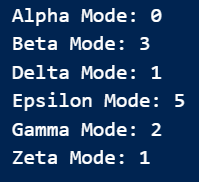

In [57]:
alpha_counts = alpha_tasting['Prediction2'].value_counts().reset_index()
beta_counts = beta_tasting['Prediction2'].value_counts().reset_index()
delta_counts = delta_tasting['Prediction2'].value_counts().reset_index()
epsilon_counts = epsilon_tasting['Prediction2'].value_counts().reset_index()
gamma_counts = gamma_tasting['Prediction2'].value_counts().reset_index()
zeta_counts = zeta_tasting['Prediction2'].value_counts().reset_index()

#alpha_counts
#beta_counts
#print('delta',delta_counts)
#print('zeta',zeta_counts)

It is important to notice that prediction clustering has cluster index starting from 0, and taking into account last conclusions, clusters represent users in the following form

{'alpha': 0, 'beta': 3, 'delta': 1, 'epsilon': 5, 'gamma': 2, 'zeta': 4}

On the other hand, data mapping made with mixed_playlist at the beggining has the following index, taking into account that were deleted 'unknown' vlaues represented with 0

{'alpha': 1, 'beta': 2, 'delta': 3, 'epsilon': 4, 'gamma': 5, 'zeta': 6}

In [60]:
# Changing clustering values for labels that represents users 
mapping = {0 :'alpha', 3 : 'beta', 1 : 'delta',5 : 'epsilon',2 : 'gamma',4 : 'zeta'}
unknown_users_pred['Prediction'] = unknown_users_pred['Prediction'].replace(mapping)
#unknown_users_pred

# Year Classification - Regression (Predicted value = Number = Year)

In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
mixed_playlist3 = pd.read_csv('data/mixed_playlist.csv')
# Create a new "Id" column with values 'C1', 'C2', 'C3', ...
mixed_playlist3['Id'] = ['C{}'.format(i) for i in range(1, len(mixed_playlist3) + 1)]
mapping = {'unknown': 0}
mixed_playlist3['top_year'] = mixed_playlist3['top_year'].replace(mapping)
#mixed_playlist3

In [65]:
# Extracting rows where 'top_year' is 0 into a new DataFrame
predict_year = mixed_playlist3[mixed_playlist3['top_year'] == 0]
# Removing these rows from the original mixed_playlist DataFrame
train_regression_year = mixed_playlist3[mixed_playlist3['top_year'] != 0]
#predict_year
#train_regression_year

In this case the feature is the colums that has numeric values

The target is the top_year column

In [66]:
feature_df = train_regression_year[['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']]
target_df = train_regression_year[['top_year']]


In [67]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

# obtain basic information
print("The number of features:", len(feature_df.columns))
print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

The number of features: 13
Size of training dataset: 1899
Size of testing dataset: 1900


In [72]:
# fit the multiple linear regression model
mlr = LinearRegression(fit_intercept = True)
mlr.fit(X_train, y_train)

LinearRegression()

In [73]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, mlr.predict(X_train), squared = False)
r2_train = r2_score(y_train, mlr.predict(X_train))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 1.7978634930649955
R2 train: 0.19928858225115176


Initial prediction with known data = known years 

In [74]:
# make predictions on testing dataset
y_pred = mlr.predict(X_test)

In [75]:
# model performance on the testing dataset
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

RMSE test: 1.807093053842517
R2 test: 0.18689545199682212


It is necesary to made another test and split but with all the data un predict_year and changing test for 100%

In [82]:
feature_df2 = predict_year[['length', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode', 'release_year']]
#target_df2 = predict_year[['top_year']]

In [83]:
# make predictions on testing dataset
y_pred = mlr.predict(feature_df2)
# y_pred

# Convert the numpy array to a Pandas DataFrame
predictions_year = pd.DataFrame(y_pred, columns=['Predicted Values'])
# Round the 'Predicted Values' column to 0 decimal places
predictions_year['Predicted Values'] = predictions_year['Predicted Values'].round(0)

# Display the DataFrame
try_pred3 = predictions_year

try_pred_uk3 = predict_year
# Reset index (Really important to pair predictions)
try_pred_uk3.reset_index(drop=True, inplace=True)

#try_pred_uk3
#try_pred3

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [84]:
# Concatenate 'unknown_df' and 'merged_df' horizontally (along columns)
merged_df3 = pd.concat([try_pred_uk3, try_pred3], axis=1)

# Now 'result_df' contains 'unknown_df' with the 'Prediction' column added
#merged_df3 

In [85]:
columns_to_show = ['Id', 'Predicted Values']
unknow_years_pred = merged_df3.loc[:, columns_to_show]
# merged_df = merged_df.dropna(subset=['Id'])
unknow_years_pred

# If it is needed to review prediction pairsing, it can be done converting dataset to csv or looking at the variable in the kernel
#merged_df.to_csv('data/lol.csv', index=False)

Id  Predicted Values
0      C1            2021.0
1     C76            2020.0
2     C81            2019.0
3     C93            2020.0
4    C151            2018.0
..    ...               ...
95  C3646            2020.0
96  C3726            2019.0
97  C3762            2020.0
98  C3803            2018.0
99  C3899            2019.0

[100 rows x 2 columns]

# Re Build Entire Dataset and organizing users playlists

In [86]:
re_build = pd.read_csv('data/mixed_playlist.csv')
# Create a new "Id" column with values 'C1', 'C2', 'C3', ...
re_build['Id'] = ['C{}'.format(i) for i in range(1, len(re_build) + 1)]

# Extracting unknown rows
unknown_re_build = re_build[re_build['user'] == 'unknown']
#unknown_re_build
# Extracting all known values
known_re_build = re_build[re_build['user'] != 'unknown']
#known_re_build

In [87]:
print(unknow_years_pred)
print(unknown_users_pred)


       Id  Predicted Values
0      C1            2021.0
1     C76            2020.0
2     C81            2019.0
3     C93            2020.0
4    C151            2018.0
..    ...               ...
95  C3646            2020.0
96  C3726            2019.0
97  C3762            2020.0
98  C3803            2018.0
99  C3899            2019.0

[100 rows x 2 columns]
       Id Prediction
0      C1      delta
1     C76      delta
2     C81       zeta
3     C93      delta
4    C151      delta
..    ...        ...
95  C3646      delta
96  C3726      delta
97  C3762      delta
98  C3803      alpha
99  C3899      gamma

[100 rows x 2 columns]


In [90]:

# Merge the datasets on the 'Id' column
unkown_to_known = pd.merge(unknow_years_pred, unknown_users_pred, on='Id')
#unkown_to_known
unknown_re_build2 = pd.merge(unknown_re_build, unkown_to_known, on='Id')
# Move the 'Id' column to the last position
unknown_re_build2['Id'] = unknown_re_build2.pop('Id')
# Delete 'top_year' and 'user' columns
unknown_re_build2.drop(['top_year', 'user'], axis=1, inplace=True)
#unknown_re_build2
final_unknown_rebuild = unknown_re_build2
#final_unknown_rebuild

In [91]:
# Change the name of 'Predicted Values' column to 'top_year'
final_unknown_rebuild.rename(columns={'Predicted Values': 'top_year'}, inplace=True)
# Change the name of 'Prediction' column to 'new_column_name'
final_unknown_rebuild.rename(columns={'Prediction': 'user'}, inplace=True)
final_unknown_rebuild


In [140]:
# Concatenate 'unknown_df' and 'merged_df' horizontally (along columns)
FINAL_rebuild = pd.concat([known_re_build, final_unknown_rebuild])
# Extract the numeric part from the 'Id' column and convert it to integers for sorting
FINAL_rebuild['Id_numeric'] = FINAL_rebuild['Id'].str.extract('(\d+)').astype(int)
# Sort the DataFrame by the numeric part of 'Id'
FINAL_rebuild = FINAL_rebuild.sort_values(by='Id_numeric')
# Drop the temporary 'Id_numeric' column if you don't need it anymore
FINAL_rebuild.drop(columns='Id_numeric', inplace=True)
# Put every single year as integer
FINAL_rebuild['top_year'] = FINAL_rebuild['top_year'].astype(int)
# Renaming 'dzeta' to 'zeta' in the 'user' column
FINAL_rebuild['user'] = FINAL_rebuild['user'].replace({'dzeta': 'zeta'})

# If you want to reset the index after sorting:
FINAL_rebuild.reset_index(drop=True, inplace=True)
FINAL_rebuild

# Save the updated DataFrame with the "Id" column
#FINAL_rebuild.to_csv('data/FINAL_rebuild.csv', index=False)

name  \
0     Variations on a Polish Theme, Op. 10: No. 5 An...   
1     Je vous trouve un charme fou - En duo avec Gaë...   
2                                              Me Gusta   
3                                  L’amour en Solitaire   
4                                        Goodnight Moon   
...                                                 ...   
3894                                 My Funny Valentine   
3895                                        Petit homme   
3896              Neo-Tokyo - Dance With The Dead Remix   
3897                                               Fool   
3898                           Sea, Sex And Sun - Remix   

                                      album             artist release_date  \
0          Szymanowski: Piano Works, Vol. 2  Karol Szymanowski   06/12/1996   
1     Il suffit d'y croire (Version deluxe)              Hoshi   2018-11-30   
2                               On ira où ?                DTF   2019-10-11   
3                      Petite Amie (Deluxe)   Juliette Armanet   2018-02-02   
4                                     Volta    Boogie Belgique   2016-09-23   
...                                     ...                ...          ...   
3894                           Undercurrent         Bill Evans         1962   
3895            Earthquake (Edition Deluxe)            Kolinga   2019-04-05   
3896   Dreams of Neo-Tokyo (Deluxe Edition)          Scandroid   2017-03-31   
3897                                   Fool              Antis   2017-12-15   
3898               Sea, Sex And Sun (Remix)   Serge Gainsbourg   29/04/2022   

      length  popularity  acousticness  danceability   energy  \
0      76933          53      0.996000         0.329  0.00695   
1     172626          62      0.622000         0.615  0.59900   
2     175269          72      0.413000         0.834  0.73400   
3     175266           0      0.404000         0.797  0.50600   
4     264735          53      0.061600         0.788  0.67500   
...      ...         ...           ...           ...      ...   
3894  324133          41      0.992000         0.529  0.13300   
3895  185506           0      0.942000         0.417  0.19600   
3896  352105          51      0.000016         0.467  0.95400   
3897  154826          16      0.045300         0.589  0.79200   
3898  229626          33      0.161000         0.724  0.73600   

      instrumentalness  ...    tempo  valence  time_signature  key  mode  \
0             0.866000  ...   70.295    0.238               4   11     0   
1             0.000008  ...   86.976    0.626               4    1     1   
2             0.000040  ...   89.989    0.356               4    6     0   
3             0.000153  ...  128.027    0.539               4    5     0   
4             0.711000  ...  107.993    0.525               4    7     0   
...                ...  ...      ...      ...             ...  ...   ...   
3894          0.922000  ...  115.924    0.585               4    0     0   
3895          0.001700  ...   76.774    0.505               3    4     0   
3896          0.908000  ...  122.004    0.061               4    0     0   
3897          0.008480  ...  182.051    0.658               4    6     1   
3898          0.004440  ...  118.989    0.384               4    5     1   

                                       uri  release_year  top_year   user  \
0     spotify:track:3bcdLMrAxrfn5dxInjIdI2          1996      2021  delta   
1     spotify:track:0C2yaSWVgCUiiqPyYxSOkd          2018      2022  delta   
2     spotify:track:6P3FBaZfUjeWYExU2ShaPZ          2019      2020  gamma   
3     spotify:track:2tn51grfchxArwPXeXkoX5          2018      2018  gamma   
4     spotify:track:2rvo9Ddv18aRV0OJldhWTf          2016      2020  alpha   
...                                    ...           ...       ...    ...   
3894  spotify:track:5jIvud0zWXDpINxFqXfbpv          1962      2020   beta   
3895  spotify:track:6ejfdgCwtSp7g2kl9RMAT1          2019      2020  delta   
3896  

In [141]:
folder_name = "Playlists"

# Check if the folder already exists
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'Playlists' already exists.


In [142]:
# Group the dataset by 'user' and 'top_year'
grouped = FINAL_rebuild.groupby(['user', 'top_year'])

# Iterate through the groups and create separate datasets in user-specific folders
for group_name, group_data in grouped:
    user, top_year = group_name
    user_folder = os.path.join('Playlists', f'user_{user}')
    os.makedirs(user_folder, exist_ok=True)
    dataset_name = f'dataset_user_{user}_top_year_{top_year}.csv'
    dataset_path = os.path.join(user_folder, dataset_name)
    group_data.to_csv(dataset_path, index=False)
    print(f"Created {dataset_path} for user {user} and top_year {top_year}")

Created Playlists\user_alpha\dataset_user_alpha_top_year_2016.csv for user alpha and top_year 2016
Created Playlists\user_alpha\dataset_user_alpha_top_year_2017.csv for user alpha and top_year 2017
Created Playlists\user_alpha\dataset_user_alpha_top_year_2018.csv for user alpha and top_year 2018
Created Playlists\user_alpha\dataset_user_alpha_top_year_2019.csv for user alpha and top_year 2019
Created Playlists\user_alpha\dataset_user_alpha_top_year_2020.csv for user alpha and top_year 2020
Created Playlists\user_alpha\dataset_user_alpha_top_year_2021.csv for user alpha and top_year 2021
Created Playlists\user_alpha\dataset_user_alpha_top_year_2022.csv for user alpha and top_year 2022
Created Playlists\user_beta\dataset_user_beta_top_year_2016.csv for user beta and top_year 2016
Created Playlists\user_beta\dataset_user_beta_top_year_2017.csv for user beta and top_year 2017
Created Playlists\user_beta\dataset_user_beta_top_year_2018.csv for user beta and top_year 2018
Created Playlists\u

## Accesing to the users playlist throught dictionaries 

In [144]:
# Loading Users playlist Dataset
# Base directory where the folders with CSV files are located
base_dir = 'Playlists/'

# Initialize a dictionary to store the DataFrames with the filename as the key
dataframes = {}

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if the path is actually a directory
    if os.path.isdir(folder_path):
        
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            
            # Construct the full file path
            file_path = os.path.join(folder_path, file_name)
            
            # Check if the file is a CSV
            if file_name.endswith('.csv'):
                
                # Read the CSV file and store the DataFrame
                df = pd.read_csv(file_path)
                
                # Use the filename without extension as the dictionary key
                dataframe_key = os.path.splitext(file_name)[0]
                dataframes[dataframe_key] = df

# At this point, you have a dictionary with each DataFrame accessible by its key
# For example, to access the DataFrame for 'user_alpha_2016', you would use:
#dataframes['user_alpha_2016']
# For recomended playlists
dataframes['dataset_user_alpha_top_year_2016']

name                    album  \
0                            Petit bonhomme  Tant Pis ! Tant Mieux !   
1   Madame La République - Original Version     Madame La République   
2                    It's Only A Paper Moon           Ella & Friends   
3                      Howl's moving castle              Prima O Poi   
4                     The Nosebleed Section    The Nosebleed Section   
..                                      ...                      ...   
95        La soucoupe volante (with Leeroy)          Enfantillages 2   
96                              A petit feu  Les paradis Disponibles   
97                                   Parade                Tohu Bohu   
98                                      Sun  Beacon (Deluxe Version)   
99                                      Fly                 Divenire   

                  artist release_date  length  popularity  acousticness  \
0           Les Wriggles   2007-11-19  203746           1       0.86300   
1                  Ridan   2012-04-09  202280           0       0.65600   
2        Ella Fitzgerald   1996-01-01  156933           0       0.95800   
3     Giovanni Mirabassi   2005-09-09  277106           0       0.83300   
4          Hilltop Hoods   2016-01-22  219640          60       0.51000   
..                   ...          ...     ...         ...           ...   
95              Aldebert   2013-10-07  199293          26       0.34700   
96              Aldebert   2006-10-02  185733           0       0.50800   
97                  Rone   2012-11-05  381157          43       0.09640   
98  Two Door Cinema Club   2012-01-01  187720           0       0.00982   
99      Ludovico Einaudi   2007-04-20  280920           0       0.99400   

    danceability  energy  instrumentalness  ...    tempo  valence  \
0          0.827   0.190          0.000002  ...  129.884   0.7300   
1          0.756   0.596          0.000000  ...  121.040   0.9280   
2          0.732   0.138          0.000000  ...  118.440   0.6340   
3          0.381   0.307          0.942000  ...  175.182   0.3900   
4          0.846   0.828          0.000001  ...   97.453   0.9080   
..           ...     ...               ...  ...      ...      ...   
95         0.720   0.769          0.000000  ...   92.044   0.7140   
96         0.597   0.539          0.000000  ...   97.541   0.5660   
97         0.632   0.434          0.769000  ...  119.989   0.1100   
98         0.649   0.533          0.000364  ...   96.973   0.6110   
99         0.160   0.178          0.848000  ...   75.973   0.0348   

    time_signature  key  mode                                   uri  \
0                4    4     0  spotify:track:3uyV36mgycFnrr1P53oRcX   
1                4    5     0  spotify:track:7rRiDC4z1oOQMC6QiHpFgJ   
2                4   10     1  spotify:track:5CMw1IWB7JOpUY9nk54n1K   
3                3    7     0  spotify:track:2INC8sCq97E6QHdxOv7X1E   
4                4    1     1  spotify:track:0shAFLY8DIPuKbiFS8RqQP   
..             ...  ...   ...                                   ...   
95               4    7     0  spotify:track:5taxp3S9K7lBgTZWlaTer1   
96               3    2     0  spotify:track:7359kzScp86uQ01v8dmbn8   
97               4    7     1  spotify:track:4bPX3ZV62LJxidVbYjlhZL   
98               4    4     0  spotify:track:3kAwGo8mtUPsrctroxYLku   
99               3    1     0  spotify:track:0UdTjf1Bhw6zJOG86GrbiJ   

    release_year  top_year   user     Id  
0           2007      2016  alpha    C29  
1           2012      2016  alpha    C32  
2           1996      2016  alpha    C71  
3           2005      2016  alpha   C173  
4           2016      2016  alpha   C220  
..           ...       ...    ...    ...  
95          2013      2016  alpha  C3619  
96          2006      2016  alpha  C3743  
97          2012      2016  alpha  C3753  
98          2012      2016  alpha  C3767  
99          2007      2016  alpha  C3845  

[100 rows x 23 columns]